<a href="https://colab.research.google.com/github/roitraining/PythonML/blob/Development/Ch07-ClassificationAnalysis/07-01-ClassificationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Combine the multiple files into one big CSV since we could not load a large file to GitHub.

In [1]:
! ./combine.sh

### Read in a set of data and examine it

In [37]:
import pandas as pd
df = pd.read_csv('CreditCardFraud.csv')

print (df.shape, df.columns)
train_size = .3
test_size = .1

print (df.head())
print (df.isFraud.value_counts())
print (df.type.value_counts())
dfOrig = df

(6362620, 11) Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.

### Keep the columns we want and change the type to code numbers instead

In [47]:
columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud', 'isFraud']
df = df[columns]
df.type = pd.Categorical(df.type).codes
print (df.shape, df.columns)
display (df.head())


(6362620, 8) Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')


/home/student/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


type    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     3   9839.64       170136.0       160296.36             0.0   
1     3   1864.28        21249.0        19384.72             0.0   
2     4    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     3  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFlaggedFraud  isFraud  
0             0.0               0        0  
1             0.0               0        0  
2             0.0               0        1  
3             0.0               0        1  
4             0.0               0        0

### Prepare train & test sets with desired columns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
dfNB = df
trainNB_X, testNB_X, trainNB_Y, testNB_Y = train_test_split(dfNB[dfNB.columns[:-1]], dfNB.isFraud, train_size = train_size, test_size = test_size, random_state = 10)
print (testNB_Y.value_counts())
print(trainNB_Y.value_counts()/trainNB_Y.count())
print(testNB_Y.value_counts()/testNB_Y.count())
display (trainNB_X[:10])
display(trainNB_Y)

0    635452
1       810
Name: isFraud, dtype: int64
0    0.99872
1    0.00128
Name: isFraud, dtype: float64
0    0.998727
1    0.001273
Name: isFraud, dtype: float64


type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
182         1  112086.81           0.00            0.00       292728.00   
205157      3    6414.77      540718.70       534303.93            0.00   
633460      1  238279.49           0.00            0.00      2322920.58   
1756822     0  355535.84     3129581.40      3485117.24      1006386.03   
4090406     1  262956.70           0.00            0.00       594350.90   
3714556     3     903.80        6470.00         5566.20            0.00   
5045353     0  173044.76       14602.00       187646.76       623384.55   
5400322     3   10645.75       17785.24         7139.49            0.00   
4371231     3    6901.64           0.00            0.00            0.00   
2548520     0  130360.21    20662331.98     20792692.20      3411476.98   

         newbalanceDest  isFlaggedFraud  
182            55974.56               0  
205157             0.00               0  
633460       2561200.07               0  
1756822       344153.87               0  
4090406       857307.60               0  
3714556            0.00               0  
5045353       450339.78               0  
5400322            0.00               0  
4371231            0.00               0  
2548520      3281116.77               0

182        0
205157     0
633460     0
1756822    0
4090406    0
3714556    0
5045353    0
5400322    0
4371231    0
2548520    0
2875405    0
5886911    0
1560217    0
746944     0
2081429    0
4079576    0
3043510    0
1846238    0
5288168    0
2379174    0
2782083    0
6088459    0
4446073    0
3426038    0
3450612    0
4944168    0
5627473    0
1385613    0
2640348    0
3601749    0
          ..
1930797    0
3871576    0
129411     0
2100598    0
4319163    0
2829014    0
3981771    0
4823650    0
2585561    0
4681518    0
5840559    0
4806677    0
4209578    0
576014     0
2142526    0
1888543    0
1806768    0
5499281    0
493671     0
3165656    0
1948510    0
3977663    0
1020582    0
422492     0
4652997    0
1220941    0
4639760    0
6193858    0
6331798    0
1459530    0
Name: isFraud, Length: 1908786, dtype: int64

## Create a Naive Bayes model

In [7]:
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()
modelNB.fit(trainNB_X, trainNB_Y)

GaussianNB(priors=None, var_smoothing=1e-09)

### Examine the results of Naive Bayes

In [11]:
predNB_Y = modelNB.predict(testNB_X)
print(type(predNB_Y))
print(type(testNB_Y))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testNB_Y, predNB_Y)
print(type(cm))
print (cm)

# # helper function to print confusion matrix as percentages
def cm_percent(cm, length, legend = True):
    import numpy as np
    if legend:
       print (' PC', 'FP\n', 'FN', 'PW')
    return np.ndarray(shape = (2,2), buffer = np.array([100 *(cm[0][0] + cm[1][1])/length,
       100 * cm[0][1]/length, 100 * cm[1][0]/length, 100 * (cm[1][0] + cm[0][1])/length]))

cmp = cm_percent(cm, len(testNB_Y))
print (cmp)
print (testNB_Y.value_counts())
print (len(testNB_Y))


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
[[633091   2361]
 [   655    155]]
 PC FP
 FN PW
[[99.52598144  0.37107355]
 [ 0.10294501  0.47401856]]
0    635452
1       810
Name: isFraud, dtype: int64
636262


## Save a trained model

In [31]:
print (dfNB.columns)
def realtimepredict(trantype, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud
):
    x1 = pd.DataFrame([(trantype, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest, isFlaggedFraud
)], columns = ['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'])
    modelNB2 = load('/home/student/modelNB.joblib')
    return modelNB2.predict(x1)

pred = realtimepredict(1, 1000, 2000, 100000, 232, 4342, 0)
print (pred)
    

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'isFraud'],
      dtype='object')
[0]


In [12]:
from joblib import dump, load
dump(modelNB, '/home/student/modelNB.joblib') 


['/home/student/modelNB.joblib']

## Load a saved model

In [10]:
modelNB2 = load('/home/student/modelNB.joblib')
predNB_Y = modelNB2.predict(testNB_X)
cm = confusion_matrix(testNB_Y, predNB_Y)
print (cm)
cmp = cm_percent(cm, len(testNB_Y))
print (cmp)

[[629075   6358]
 [   688    141]]
 PC FP
 FN PW
[[98.89259456  0.99927388]
 [ 0.10813156  1.10740544]]


## Train the Decision Tree model

In [21]:
from sklearn.tree import DecisionTreeClassifier
dfDT = df
trainDT_X, testDT_X, trainDT_Y, testDT_Y = train_test_split(dfDT[dfDT.columns[:-1]], dfDT.isFraud, train_size = train_size, test_size = test_size)

modelDT = DecisionTreeClassifier()
modelDT.fit(trainDT_X, trainDT_Y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
print(modelDT.feature_importances_)
print(testDT_X.columns)

[0.00450982 0.18285205 0.34712495 0.05039773 0.09961967 0.31549577
 0.        ]
Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')


## Examine the results of the Decision Tree

In [26]:
def important_features(model, columns):
    return pd.DataFrame(model.feature_importances_, columns=['Importance'], index = columns).sort_values(['Importance'], ascending = False)
 
predDT_Y = modelDT.predict(testDT_X)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testDT_Y, predDT_Y)
print (cm)
print (cm_percent(cm, len(testDT_Y)))
print (testDT_Y.value_counts(), len(testDT_Y))
print (important_features(modelDT, trainDT_X.columns))



[[635421     72]
 [    54    715]]
 PC FP
 FN PW
[[9.99801968e+01 1.13160931e-02]
 [8.48706979e-03 1.98031628e-02]]
0    635493
1       769
Name: isFraud, dtype: int64 636262
                Importance
oldbalanceOrg     0.347125
newbalanceDest    0.315496
amount            0.182852
oldbalanceDest    0.099620
newbalanceOrig    0.050398
type              0.004510
isFlaggedFraud    0.000000


In [32]:
# pip install pydotplus
# sudo apt install -y graphviz

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelDT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Prepare the data
### Logistic Regression requires categorical data be dummy encoded

In [45]:
#dfDT.columns
from sklearn import preprocessing as pp
#dfOrig
#print (pd.get_dummies(dfOrig.type, prefix = 'type', drop_first = True))

print (dfOrig.columns)

print(list(dfOrig.columns).index('type'))

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
4


In [48]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
def dummy_code(data, columns, drop_first = True):
    for c in columns:
        dummies = pd.get_dummies(data[c], prefix = c, drop_first = drop_first)
        i = list(data.columns).index(c)
        data = pd.concat([data.iloc[:,:i], dummies, data.iloc[:,i+1:]], axis = 1)
    return data

dfLR = dummy_code(df, ['type'], drop_first = True)
display (dfLR)
trainLR_X, testLR_X, trainLR_Y, testLR_Y = train_test_split(dfLR.iloc[:,dfLR.columns != 'isFraud'], dfLR.isFraud, train_size = train_size, test_size = test_size)

print (testLR_X.columns)
print (testLR_X.head())


type_1  type_2  type_3  type_4      amount  oldbalanceOrg  \
0             0       0       1       0     9839.64      170136.00   
1             0       0       1       0     1864.28       21249.00   
2             0       0       0       1      181.00         181.00   
3             1       0       0       0      181.00         181.00   
4             0       0       1       0    11668.14       41554.00   
5             0       0       1       0     7817.71       53860.00   
6             0       0       1       0     7107.77      183195.00   
7             0       0       1       0     7861.64      176087.23   
8             0       0       1       0     4024.36        2671.00   
9             0       1       0       0     5337.77       41720.00   
10            0       1       0       0     9644.94        4465.00   
11            0       0       1       0     3099.97       20771.00   
12            0       0       1       0     2560.74        5070.00   
13            0       0       1       0    11633.76       10127.00   
14            0       0       1       0     4098.78      503264.00   
15            1       0       0       0   229133.94       15325.00   
16            0       0       1       0     1563.82         450.00   
17            0       0       1       0     1157.86       21156.00   
18            0       0       1       0      671.64       15123.00   
19            0       0       0       1   215310.30         705.00   
20            0       0       1       0     1373.43       13854.00   
21            0       1       0       0     9302.79       11299.00   
22            0       1       0       0     1065.41        1817.00   
23            0       0       1       0     3876.41       67852.00   
24            0       0       0       1   311685.89       10835.00   
25            0       0       1       0     6061.13         443.00   
26            0       0       1       0     9478.39      116494.00   
27            0       0       1       0     8009.09       10968.00   
28            0       0       1       0     8901.99        2958.91   
29            0       0       1       0     9920.52           0.00   
...         ...     ...     ...     ...         ...            ...   
6362590       0       0       0       1   323726.61      323726.61   
6362591       1       0       0       0   323726.61      323726.61   
6362592       0       0       0       1   383661.10      383661.10   
6362593       1       0       0       0   383661.10      383661.10   
6362594       0       0       0       1   144945.34      144945.34   
6362595       1       0       0       0   144945.34      144945.34   
6362596       0       0       0       1    48442.88       48442.88   
6362597       1       0       0       0    48442.88       48442.88   
6362598       0       0       0       1  4009058.39     4009058.39   
6362599       1       0       0       0  4009058.39     4009058.39   
6362600       0       0       0       1   652993.91      652993.91   
6362601       1       0       0       0   652993.91      652993.91   
6362602       0       0       0       1  1819543.69     1819543.69   
6362603       1       0       0       0  1819543.69     1819543.69   
6362604       0       0       0       1    54652.46       54652.46   
6362605       1       0       0       0    54652.46       54652.46   
6362606       0       0       0       1   303846.74      303846.74   
6362607       1       0       0       0   303846.74      303846.74   
6362608       0       0       0       1   258355.42      258355.42   
6362609       1       0       0       0   258355.42      258355.42   
6362610       0       0       0       1    63416.99       63416.99   
6362611       1       0       0       0    63416.99       63416.99   
6362612       0       0       0       1  1258818.82     1258818.82   
6362613       1       0       0       0  1258818.82     1258818.82   
6362614       0       0       0       1   339682.13      339682.13   
6362615       1    

Index(['type_1', 'type_2', 'type_3', 'type_4', 'amount', 'oldbalanceOrg',
       'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud'],
      dtype='object')
         type_1  type_2  type_3  type_4     amount  oldbalanceOrg  \
6058005       0       0       0       1  158565.49        6057.00   
4220869       0       0       0       0   10661.26     4012264.11   
2360508       1       0       0       0   46366.16      217885.00   
5060022       0       0       0       0   53438.04      662773.21   
5047421       0       0       0       0  403013.54     3466908.73   

         newbalanceOrig  oldbalanceDest  newbalanceDest  isFlaggedFraud  
6058005            0.00       368861.31       527426.80               0  
4220869      4022925.38       553910.20       543248.93               0  
2360508       171518.84            0.00        46366.16               0  
5060022       716211.25        60025.12         6587.08               0  
5047421      3869922.27     10812817.50

## Create a Logistic Regression model

In [49]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='auto', solver='lbfgs')
modelLR.fit(trainLR_X, trainLR_Y)
print(modelLR.coef_)

[[-2.12691064e-08 -1.69487575e-09 -2.47922330e-07 -9.51811833e-10
  -6.41850044e-04  6.44728461e-04 -7.14660124e-04 -5.67149822e-08
  -1.71888087e-06  1.17382862e-11]]


## Examine the results of Logistic Regression

0.9982145719844969 0.0017854280155030476
[[634465    957]
 [   179    661]]
 PC FP
 FN PW
[[9.98214572e+01 1.50409737e-01]
 [2.81330647e-02 1.78542802e-01]]
[[1.00000000e+000 1.23801400e-043]
 [1.00000000e+000 2.77836856e-129]
 [9.99993481e-001 6.51866247e-006]
 ...
 [1.00000000e+000 3.35141460e-210]
 [7.04148114e-001 2.95851886e-001]
 [1.00000000e+000 5.09695413e-119]]
******
[0.         0.         0.         ... 0.89109127 0.93751711 1.        ] [0.         0.00119048 0.04285714 ... 0.99404762 0.99404762 1.        ] [2.00000000e+000 1.00000000e+000 9.99991667e-001 ... 2.66473114e-215
 5.61719995e-309 0.00000000e+000]


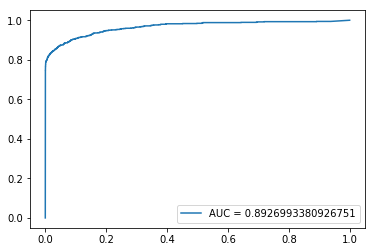

ModuleNotFoundError: No module named 'scikitplot'

In [55]:
%matplotlib inline
import numpy as np
predLR_Y = modelLR.predict(testLR_X)
from sklearn.metrics import confusion_matrix
score = modelLR.score(testLR_X, testLR_Y)
mse = np.mean((predLR_Y - testLR_Y)**2)
print (score, mse)

cm = confusion_matrix(testLR_Y, predLR_Y)
print (cm)
cmp = cm_percent(cm, len(testLR_Y))
print (cmp)

predLR_Y1 = modelLR.predict_proba(testLR_X)
print(predLR_Y1)
from sklearn.metrics import roc_auc_score, roc_curve
roc = roc_auc_score(testLR_Y, predLR_Y)
print ('******')
print(fpr, tpr, x)
fpr, tpr, x = roc_curve(testLR_Y, predLR_Y1[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label = 'AUC = ' + str(roc))
plt.legend(loc=4)
plt.show()

# import scikitplot.metrics as skplt
# import matplotlib.pyplot as plt
# skplt.plot_roc(testY, predY1)
# plt.show()


## Try Logistic Regression with different probability thresholds to change ratio of false negatives and positives

In [61]:
predLR_Y = modelLR.predict_proba(testLR_X)
print (predLR_Y[:10])
print (np.where(predLR_Y[:,0] >= .9, 0, 1)[:10])

# print ('Score', modelLR.score(testLR_X, testLR_Y))

for threshold in range(30, 91, 10):
    predLR_Y1 = np.where(predLR_Y[:,0] >= threshold/100, 0, 1)
    mse = np.mean((predLR_Y1 - testLR_Y)**2)
    cm = confusion_matrix(testLR_Y, predLR_Y1)
    print ('\nTHRESHOLD', threshold, 'MSE', mse)
    print (cm)
    print (cm_percent(cm, len(testLR_Y), legend = False))


[[1.00000000e+000 1.23801400e-043]
 [1.00000000e+000 2.77836856e-129]
 [9.99993481e-001 6.51866247e-006]
 [1.00000000e+000 2.41480907e-052]
 [1.00000000e+000 0.00000000e+000]
 [1.00000000e+000 3.05297799e-102]
 [8.47952306e-001 1.52047694e-001]
 [9.04065365e-001 9.59346350e-002]
 [1.00000000e+000 3.87584368e-212]
 [1.00000000e+000 7.78961818e-058]]
[0 0 0 0 0 0 1 0 0 0]

THRESHOLD 35 MSE 0.0006899673404980967
[[635421      1]
 [   438    402]]
[[9.99310033e+01 1.57167959e-04]
 [6.88395661e-02 6.89967340e-02]]

THRESHOLD 36 MSE 0.000677393903769202
[[635421      1]
 [   430    410]]
[[9.99322606e+01 1.57167959e-04]
 [6.75822224e-02 6.77393904e-02]]

THRESHOLD 37 MSE 0.0006585337486758599
[[635421      1]
 [   418    422]]
[[9.99341466e+01 1.57167959e-04]
 [6.56962069e-02 6.58533749e-02]]

THRESHOLD 38 MSE 0.000647531991538077
[[635421      1]
 [   411    429]]
[[9.99352468e+01 1.57167959e-04]
 [6.45960312e-02 6.47531992e-02]]

THRESHOLD 39 MSE 0.000628671836444735
[[635421      1]
 [   

## Prepare the data for a Neural Network
### This time you should not drop the first column when dummy encoding. Additionally, data works better if it is rescaled.

In [62]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
# rescale the data
dfNN = dummy_code(df, ['type'], drop_first = False)
print (dfNN.columns)
dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] /= dfNN[['amount',  'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].max()
trainNN_X, testNN_X, trainNN_Y, testNN_Y = train_test_split(dfNN.iloc[:,dfNN.columns != 'isFraud'], dfNN.isFraud, train_size = train_size, test_size = test_size)
display(trainNN_X)


Index(['type_0', 'type_1', 'type_2', 'type_3', 'type_4', 'amount',
       'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFlaggedFraud', 'isFraud'],
      dtype='object')


type_0  type_1  type_2  type_3  type_4    amount  oldbalanceOrg  \
5491285       0       1       0       0       0  0.000064       0.000545   
2196186       0       0       0       1       0  0.000041       0.000000   
2504484       0       1       0       0       0  0.002202       0.000000   
1503594       0       1       0       0       0  0.004066       0.000000   
2287393       0       0       0       1       0  0.000070       0.000000   
6312524       1       0       0       0       0  0.002862       0.082355   
801658        0       1       0       0       0  0.000689       0.000000   
2665841       0       1       0       0       0  0.001268       0.000000   
1299633       0       0       0       1       0  0.000109       0.002494   
2545471       0       1       0       0       0  0.001529       0.000005   
586400        0       0       0       1       0  0.000059       0.000000   
3441430       0       1       0       0       0  0.000487       0.002549   
4266548       0       0       0       1       0  0.000144       0.000226   
3676354       0       0       0       1       0  0.000102       0.000006   
1134247       0       1       0       0       0  0.001079       0.000000   
2720976       1       0       0       0       0  0.000466       0.000358   
2567643       0       1       0       0       0  0.002001       0.000006   
6026953       0       0       0       1       0  0.000146       0.000000   
5239610       0       0       0       1       0  0.000014       0.000000   
4373616       0       0       0       1       0  0.000076       0.000012   
2683586       0       1       0       0       0  0.001107       0.000000   
5273498       0       1       0       0       0  0.001467       0.001212   
5796909       0       1       0       0       0  0.003632       0.000000   
2409582       1       0       0       0       0  0.001396       0.000010   
230456        0       0       0       0       1  0.007142       0.000000   
279952        0       0       0       1       0  0.000013       0.003785   
2212956       0       1       0       0       0  0.002184       0.000000   
3317904       0       0       0       1       0  0.000231       0.000307   
3012500       1       0       0       0       0  0.001410       0.000180   
5531454       0       1       0       0       0  0.002167       0.000680   
...         ...     ...     ...     ...     ...       ...            ...   
5525306       0       0       0       1       0  0.000463       0.004893   
1633167       0       1       0       0       0  0.000960       0.007804   
5074809       0       0       0       1       0  0.000066       0.000923   
4983554       0       1       0       0       0  0.003007       0.000344   
3715976       0       0       0       1       0  0.000080       0.000430   
578380        0       0       0       1       0  0.000230       0.000000   
2644805       0       1       0       0       0  0.001725       0.012055   
4588374       0       0       0       1       0  0.000166       0.000000   
5833742       0       0       0       1       0  0.000039       0.000000   
2975047       0       1       0       0       0  0.001630       0.000000   
596245        0       1       0       0       0  0.000858       0.000282   
4852953       0       0       0       1       0  0.000532       0.003345   
6063207       0       0       0       1       0  0.000047       0.000350   
4098923       1       0       0       0       0  0.003437       0.000516   
1318061       0       0       0       1       0  0.000074       0.000979   
2886651       0       0       0       1       0  0.000131       0.000000   
2193861       0       0       0       0       1  0.002007       0.000000   
2001726       0       0       0       1       0  0.000144       0.000012   
3580607       0       0       0       1       0  0.000097       0.003494   
3394555       0       1       0       0       0  0.003824       0.000000   
4863907       1       0       0       0       0  0.002271

## Create a Neural Network model

In [63]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes = (5, 3, 2), activation = 'logistic')
modelNN.fit(trainNN_X, trainNN_Y)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 3, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

## Examine the results of Neural Network predictions

In [27]:
predNN_Y = modelNN.predict(testNN_X)
cm = confusion_matrix(testNN_Y, predNN_Y)
print (cm)
cmp = cm_percent(cm, len(testNN_Y))
print (cmp)


[[635388     34]
 [   536    304]]
 PC FP
 FN PW
[[9.99104143e+01 5.34371061e-03]
 [8.42420261e-02 8.95857367e-02]]


## Create a SVM model

In [28]:
from sklearn import svm
train_size = .03
test_size = .01
dfSVM = dfNN
trainSVM_X, testSVM_X, trainSVM_Y, testSVM_Y = train_test_split(dfSVM.iloc[:,dfSVM.columns != 'isFraud'], dfSVM.isFraud, train_size = train_size, test_size = test_size)

def do_SVM(kernel, gamma):
    print ("\nKernel:", kernel, "Gamma:", gamma)
    modelSVM = svm.SVC(gamma = gamma,  kernel = kernel)
    modelSVM.fit(trainSVM_X, trainSVM_Y)
    print (modelSVM.score(testSVM_X, testSVM_Y))

    predSVM_Y = modelSVM.predict(testSVM_X)
    cm = confusion_matrix(testSVM_Y, predSVM_Y)
    print (cm)

do_SVM('linear', gamma='auto')

for kernel in ['rbf', 'poly', 'sigmoid']:
    for gamma in ['auto', 10, 100]:
        if not (kernel == 'poly' and gamma == 100):
           do_SVM(kernel, gamma)




Kernel: linear Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: rbf Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: rbf Gamma: 10
0.998648372546246
[[63528     0]
 [   86    13]]

Kernel: rbf Gamma: 100
0.9987898219309412
[[63528     0]
 [   77    22]]

Kernel: poly Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: poly Gamma: 10
0.9990570041020321
[[63528     0]
 [   60    39]]

Kernel: sigmoid Gamma: auto
0.998444056768353
[[63528     0]
 [   99     0]]

Kernel: sigmoid Gamma: 10
0.9979725588193691
[[63498    30]
 [   99     0]]

Kernel: sigmoid Gamma: 100
0.9975167774686847
[[63469    59]
 [   99     0]]


In [43]:
modelSVM = svm.SVC(gamma = 100)
modelSVM.fit(trainSVM_X, trainSVM_Y)
print(modelSVM.score(testSVM_X, testSVM_Y))
predSVM_Y = modelSVM.predict(testSVM_X)
print(confusion_matrix(testSVM_Y, predSVM_Y ))


0.9987898219309412
[[63528     0]
 [   77    22]]


## Ensemble Learning

## Create and train a Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
trainRF_X, trainRF_Y, testRF_X, testRF_Y = trainDT_X, trainDT_Y, testDT_X, testDT_Y
modelRF.fit(trainRF_X, trainRF_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Test the accuracy of the predictions and examine important features

In [34]:
predRF_Y = modelRF.predict(testRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, predRF_Y))
cm = confusion_matrix(testRF_Y, predRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=trainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

Accuracy: 0.9996227968981332
[[635451     25]
 [   215    571]]
oldbalanceOrg     0.344967
newbalanceDest    0.295017
amount            0.165853
oldbalanceDest    0.076471
type              0.067617
newbalanceOrig    0.050074
isFlaggedFraud    0.000000
dtype: float64


## Visualize important features

No handles with labels found to put in legend.


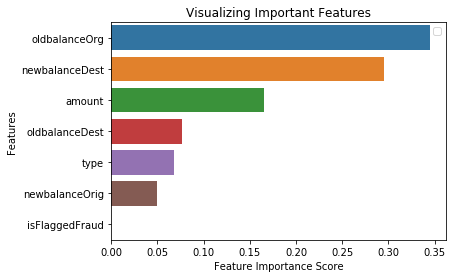

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Try removing less important features and retrain it

In [36]:
newTrainRF_X = trainRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
newTestRF_X = testRF_X[['newbalanceDest', 'oldbalanceOrg', 'amount', 'oldbalanceDest']]
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=10)
modelRF.fit(newTrainRF_X, trainRF_Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### In this case the accuracy did not go up, but in many cases it does

In [37]:
newpredRF_Y = modelRF.predict(newTestRF_X)
from sklearn import metrics
print ("Accuracy:",metrics.accuracy_score(testRF_Y, newpredRF_Y))
cm = confusion_matrix(testRF_Y, newpredRF_Y)
print (cm)

import pandas as pd
feature_imp = pd.Series(modelRF.feature_importances_,index=newTrainRF_X.columns).sort_values(ascending=False)
print (feature_imp)

Accuracy: 0.9993383228921419
[[635412     64]
 [   357    429]]
oldbalanceOrg     0.411746
amount            0.366195
newbalanceDest    0.146907
oldbalanceDest    0.075152
dtype: float64


In [40]:
from sklearn.ensemble import VotingClassifier
modelVC = VotingClassifier(estimators=[('dt', modelDT), ('nb', modelNB)], voting='hard')
modelVC.fit(trainDT_X, trainDT_Y)


VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort=False,
                                                     random_state=None,
                                                     splitter='best')),
      

In [41]:
print(modelVC.score(testDT_X,testDT_Y))

predVC_Y = modelVC.predict(testDT_X)
cm = confusion_matrix(testDT_Y, predVC_Y)
print (cm)

0.9989312578780439
[[635473      3]
 [   677    109]]


In [68]:
from sklearn.neural_network import MLPClassifier
modelNN = MLPClassifier(hidden_layer_sizes = (5, 3, 2), activation = 'logistic')
modelNN.fit(trainLR_X, trainLR_Y)

predLR = (modelLR.predict_proba(testLR_X))[:,0]
predNN = (modelNN.predict_proba(testLR_X))[:,0]

predAvg = (predLR + predNN) / 2
predAvg1 = np.where(predAvg >= .7, 0, 1)

print (confusion_matrix(testLR_Y, predAvg1))

[0 0 0 ... 0 0 0]
[[635427     14]
 [   316    505]]


In [66]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']

from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(multi_class='auto', solver='lbfgs')
# dfCV = dfLR
# X = dfLR.iloc[:,dfLR.columns != 'isFraud']
# Y = dfLR.isFraud

scores = cross_validate(modelLR, testLR_X, testLR_Y, scoring=scoring, cv=5)



['fit_time', 'score_time', 'test_precision_macro', 'test_recall_macro', 'train_precision_macro', 'train_recall_macro']


## Cross Validation

In [67]:
print (scores)
# print (sorted(scores.keys()))
# for k in scores.keys():
#     print sc

{'fit_time': array([3.55202579, 4.18740416, 3.11455274, 2.82529473, 4.25530601]), 'score_time': array([0.09601092, 0.04983139, 0.05236673, 0.05077076, 0.04943299]), 'test_precision_macro': array([0.76491851, 0.67744589, 0.76859647, 0.72358703, 0.66199794]), 'train_precision_macro': array([0.75152214, 0.69112106, 0.76479763, 0.7348445 , 0.65755513]), 'test_recall_macro': array([0.89239682, 0.88597625, 0.88349185, 0.89221583, 0.92145446]), 'train_recall_macro': array([0.89383082, 0.90241316, 0.88868052, 0.89524317, 0.91176119])}


In [70]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(modelLR, testLR_X, testLR_Y, scoring='accuracy', cv = 10)
print(accuracy)
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

[0.99883697 0.99855407 0.99817685 0.99819256 0.99858548 0.99872694
 0.99861692 0.99817685 0.99803539 0.99830258]
Accuracy of Model with Cross Validation is: 99.84204611463164


# End of notebook